Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Telecom_customer_churn.csv")
df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,...,9767-FFLEM,0639-TSIQW,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,...,No,Yes,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,No,Yes,No,No,No internet service,Yes,No,Yes,No,Yes


Load the datasets

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Above is the list of all columns

In [4]:
df.shape

(7043, 21)

we have 7043 rows amd 21 columns

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Customer id is not required for further analysis, hence we will drop the column.

In [6]:
df.drop('customerID', axis=1, inplace=True)  #customerID drop

We can see total charges column actually contains numerical value however its datatype is object.Lets change the datatypes.

In [7]:
#check unique value present in TotalCharges column.
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
#lets check is there any spaces in totalcharges column
df.loc[df['TotalCharges']==" "].T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
PhoneService,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,No,No,Yes,No phone service,No,Yes,No,No,Yes,Yes
InternetService,DSL,No,DSL,No,DSL,No,No,No,No,DSL,DSL
OnlineSecurity,Yes,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No,Yes
OnlineBackup,No,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,Yes,Yes


In [9]:
#replace spaces by nan values
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)

In [10]:
df['TotalCharges'].isnull().sum()

11

now now have getting 11 missing values . 

In [11]:
#change the data type of total charges as float coz it has numerical value 
df['TotalCharges']=df['TotalCharges'].astype(float)

In [12]:
#lets fill missing values of total charges by mean of that column
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [13]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

now TotalCharges have float datatypes.

<AxesSubplot:>

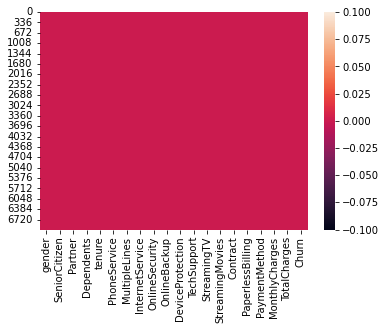

In [14]:
sns.heatmap(df.isnull())

now we have no nan values present in our datasets.

# Let's do Visualization:

In [15]:
cat_col=[]
for i in df:
    if df[i].dtype =='object':
        cat_col.append(i)
        
print(cat_col)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Male      3555
Female    3488
Name: gender, dtype: int64


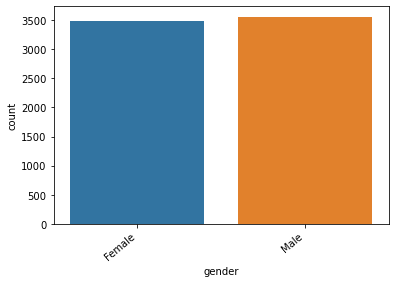

No     3641
Yes    3402
Name: Partner, dtype: int64


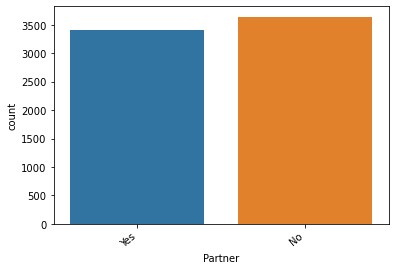

No     4933
Yes    2110
Name: Dependents, dtype: int64


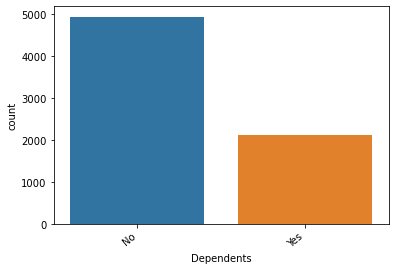

Yes    6361
No      682
Name: PhoneService, dtype: int64


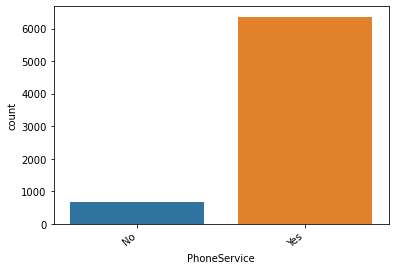

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


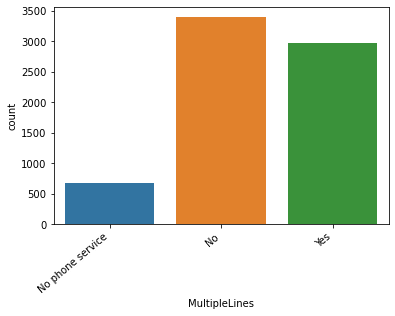

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


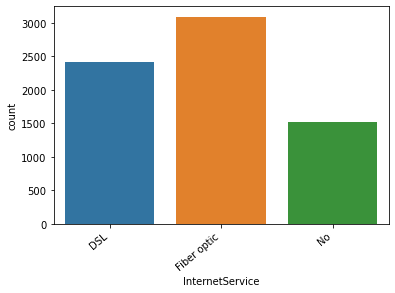

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


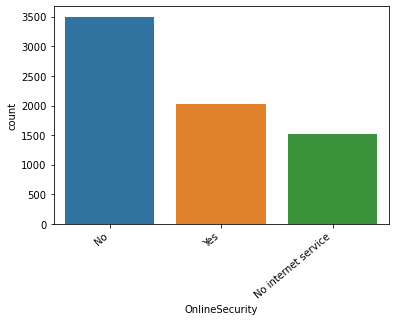

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


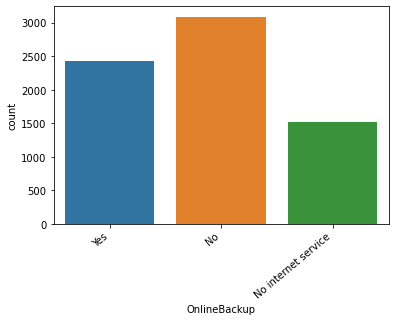

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


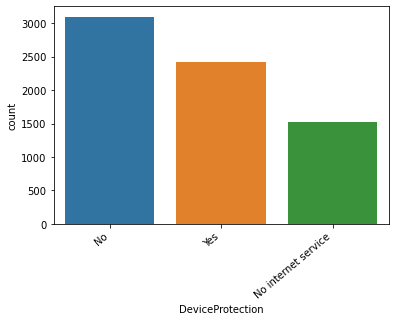

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


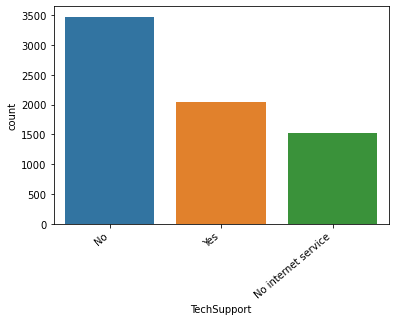

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


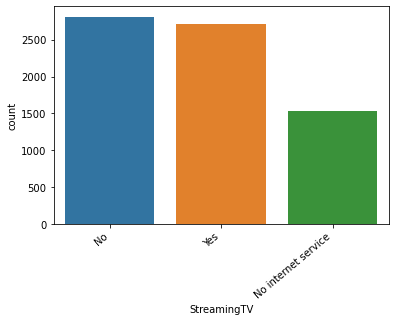

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


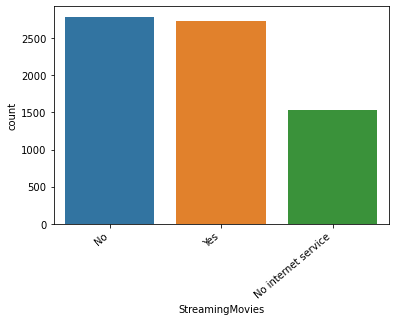

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


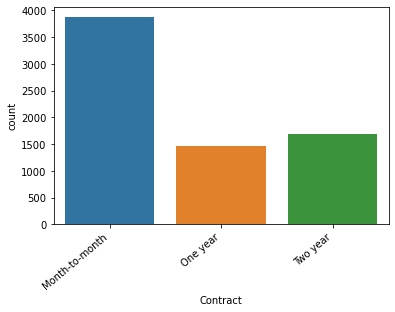

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


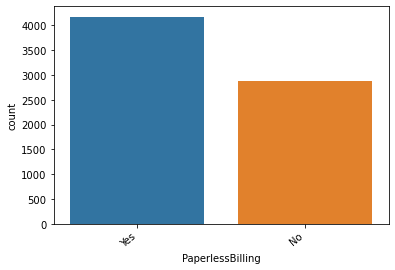

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


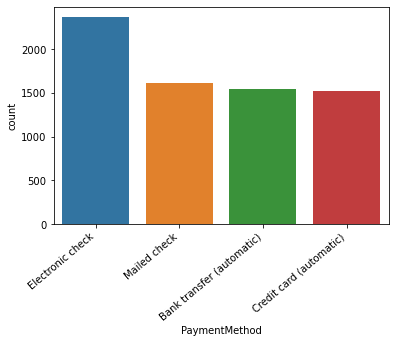

No     5174
Yes    1869
Name: Churn, dtype: int64


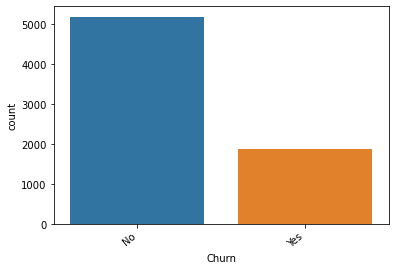

In [16]:
for i in cat_col:
    plt.figure()
    a=sns.countplot(df[i])
    print(df[i].value_counts())
    a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
    plt.show()

Churn type is our target columns . This data ar not balance, need to apply imbalace technique with SMOTE

Lets compare it with our target column:

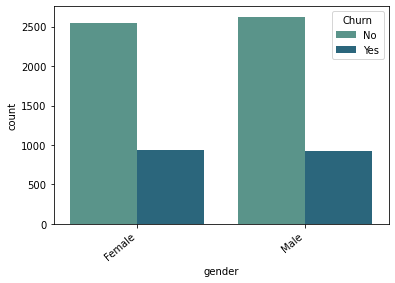

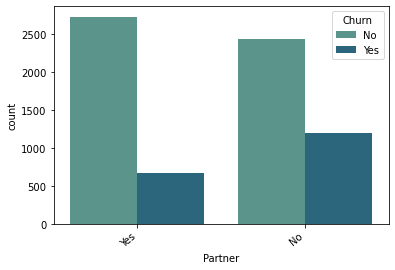

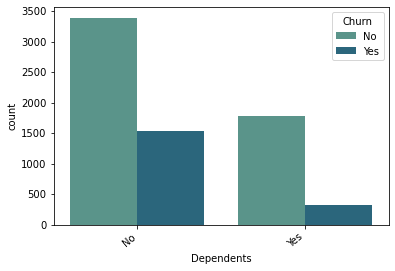

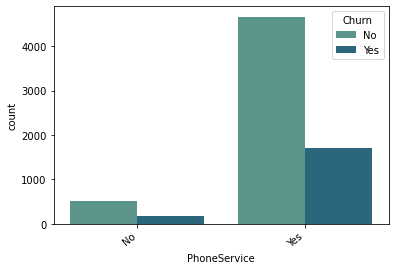

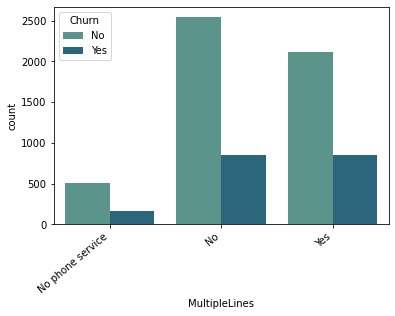

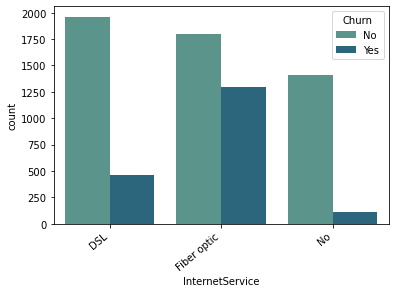

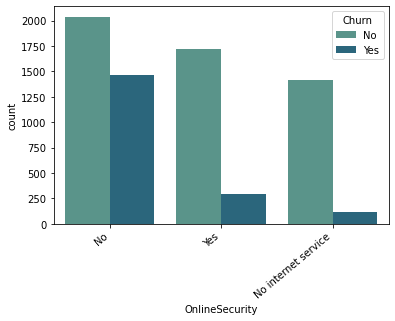

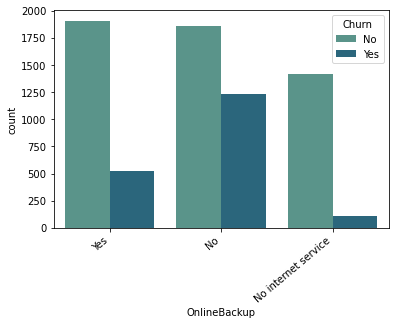

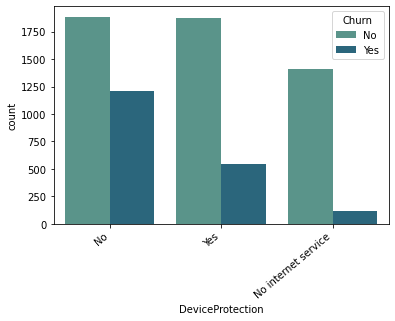

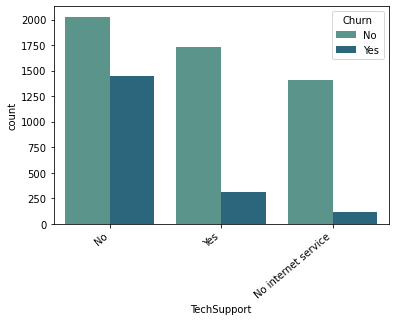

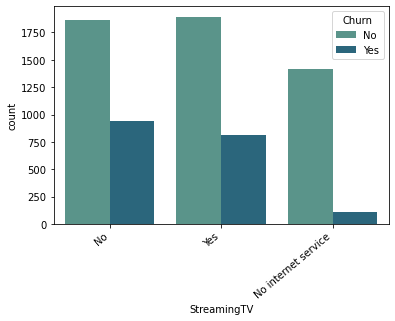

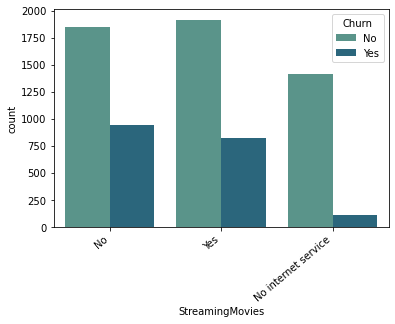

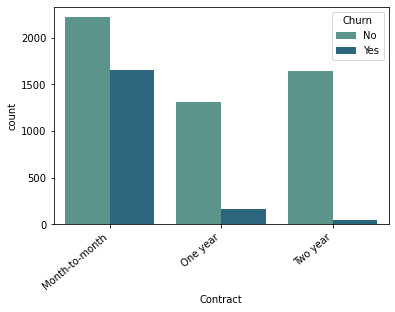

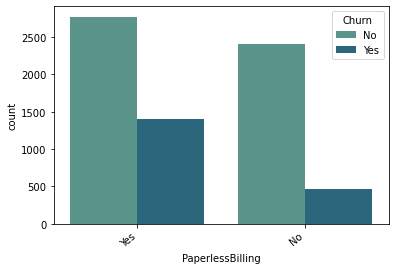

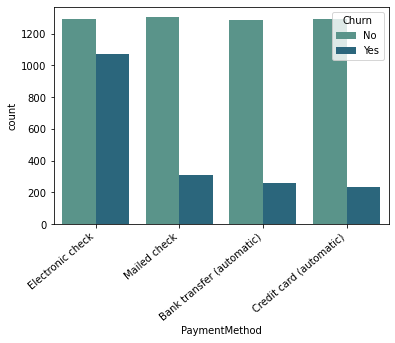

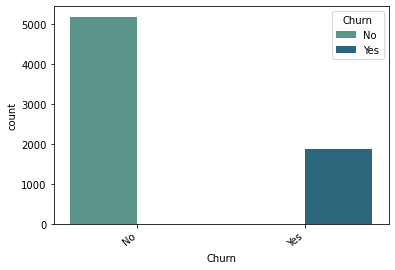

In [17]:
for i in cat_col:
    plt.figure()
    a=sns.countplot(df[i],hue=df.Churn,palette='crest')
    a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
    plt.show()

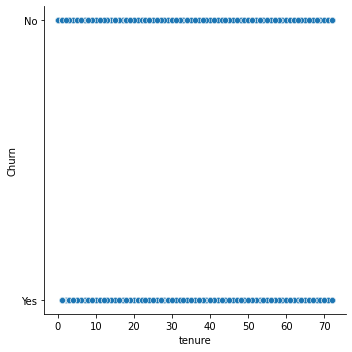

In [18]:
sns.relplot(x='tenure',y='Churn',data=df,kind='scatter')

Customer who are churned and not churned is distributed in entire range of tenure.

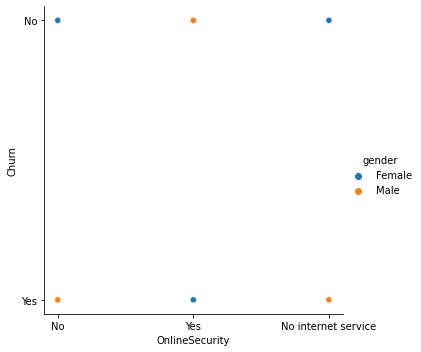

In [19]:
sns.relplot(x='OnlineSecurity',y='Churn',hue='gender',data=df,kind='scatter')

Churned male customers are with no online security or no internet service and females churned customer are with online security

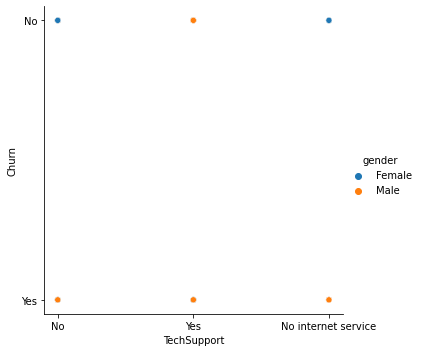

In [20]:
sns.relplot(x='TechSupport',y='Churn',hue='gender',data=df,kind='scatter')

All churned male customers are having technical support.

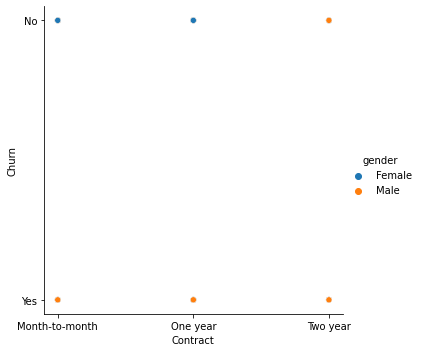

In [21]:
sns.relplot(x='Contract',y='Churn',hue='gender',data=df,kind='scatter')

All churned males are having all three types of contract i.e. month-to-month, one year and two year contract.

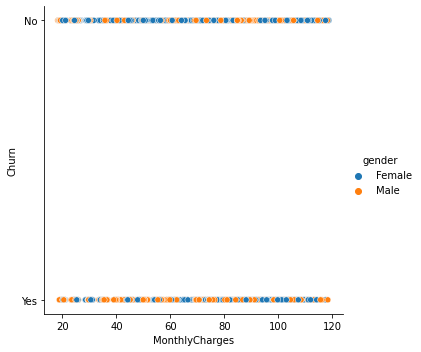

In [22]:
sns.relplot(x='MonthlyCharges',y='Churn',hue='gender',data=df,kind='scatter')

For entire range of monthly charge we have churned and not churned males and females both.

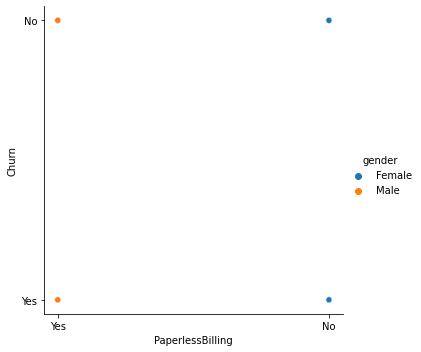

In [23]:
sns.relplot(x='PaperlessBilling',y='Churn',hue='gender',data=df,kind='scatter')

Both male and female customer who are churned has opted for paperless Billing.

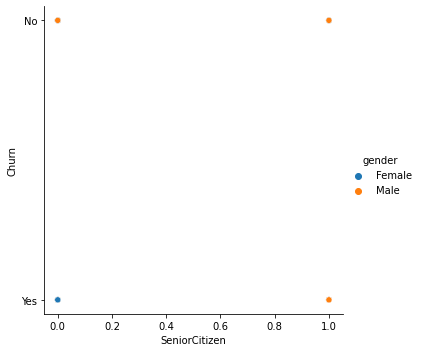

In [24]:
sns.relplot(x='SeniorCitizen',y='Churn',hue='gender',data=df,kind='scatter')

Churned male customers are senior citizen however churned female customer are not senior citizen.

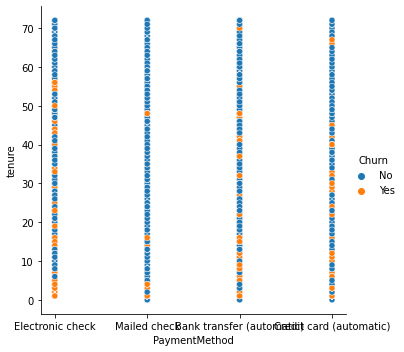

In [25]:
sns.relplot(x='PaymentMethod',y='tenure',hue='Churn',data=df,kind='scatter')

For entire range of tenure and in all types of payment method, we have churned and not churned both the customers.

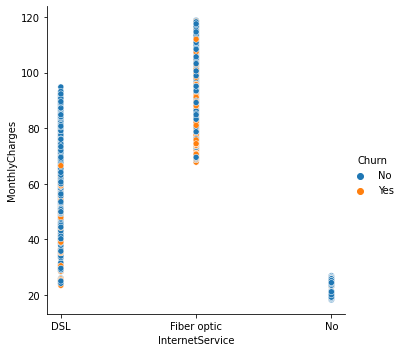

In [26]:
sns.relplot(x='InternetService',y='MonthlyCharges',hue='Churn',data=df,kind='scatter')

Monthly charges for DSL internet service are ranging from 20 to 100 then for fiber optic its ranging from 60 to 120. We have some customer for DSL and for fiber optic numbers are for churned customer.



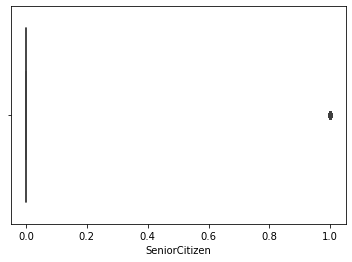

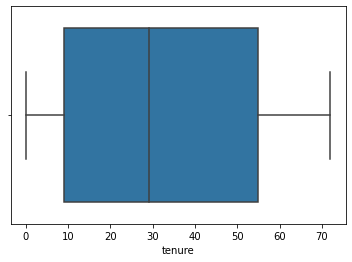

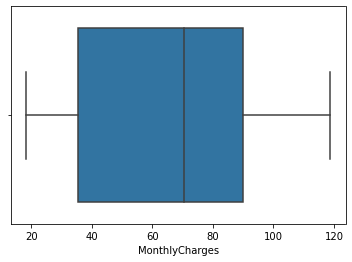

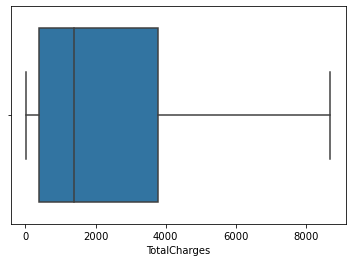

In [27]:
for i in df.columns:
        if df[i].dtype != 'object':
            plt.figure()
            sns.boxplot(x=df[i])

We cannot see any outliers in the numberical type of column. Senior citizen is an actually object type of column.

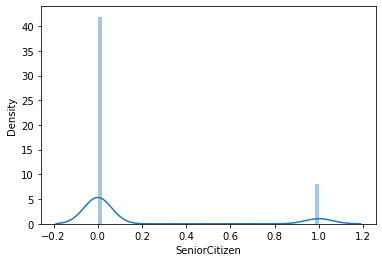

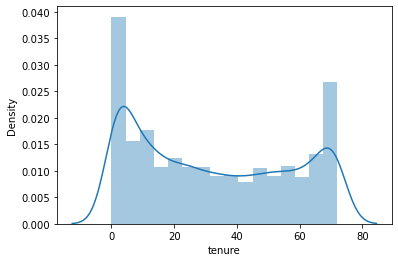

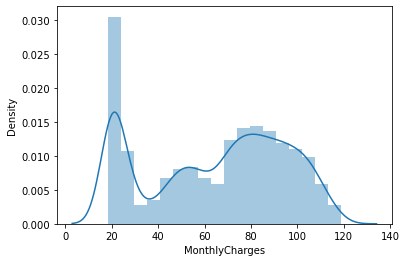

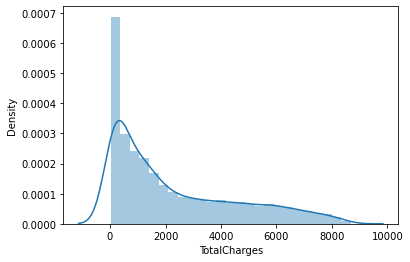

In [28]:
for i in df.columns:
    if df[i].dtype != 'object':
        plt.figure()
        sns.distplot(df[i],kde=True)

We can uneven distribution in all numberical coluumns.

In [29]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

we have some skew data in our datasets.try to remove this

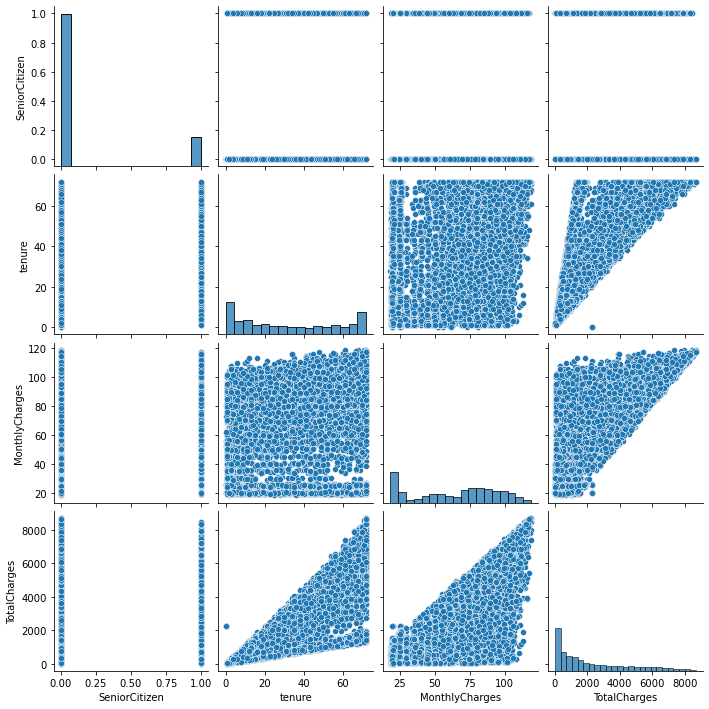

In [30]:
sns.pairplot(df)

here we can see that all dataset are lies in your nature

# Encoding:

In [31]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [32]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


now all datasets transfer to numeric format.

# Let's Describe our datasets:

In [33]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


There are large diff between 75 percentile and max for some columns,so outliers present here.lets check its with visualization

<AxesSubplot:>

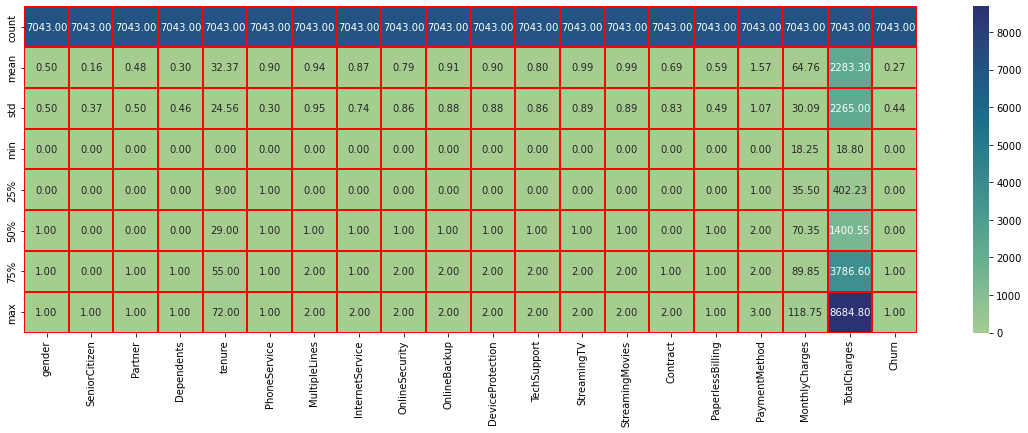

In [34]:
plt.figure(figsize=(20,6))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f",cmap="crest")

# Correlation of the columns with target columns:

In [35]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


<AxesSubplot:>

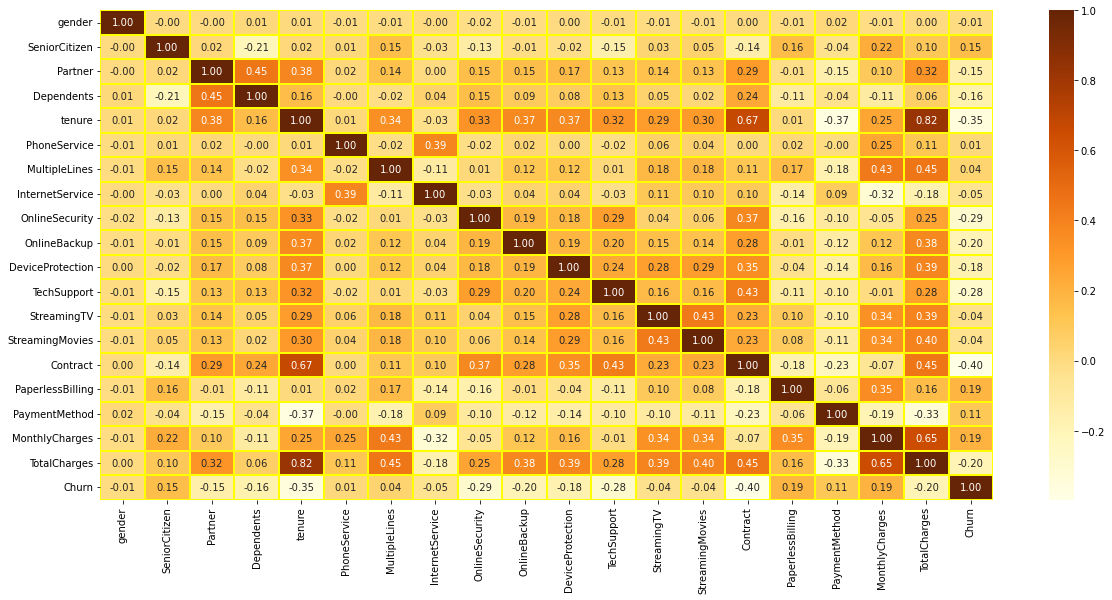

In [36]:
plt.figure(figsize=(20,9))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="yellow",fmt="0.2f",cmap="YlOrBr")

Checking the columns which are positively and negative correlated with the target columns:

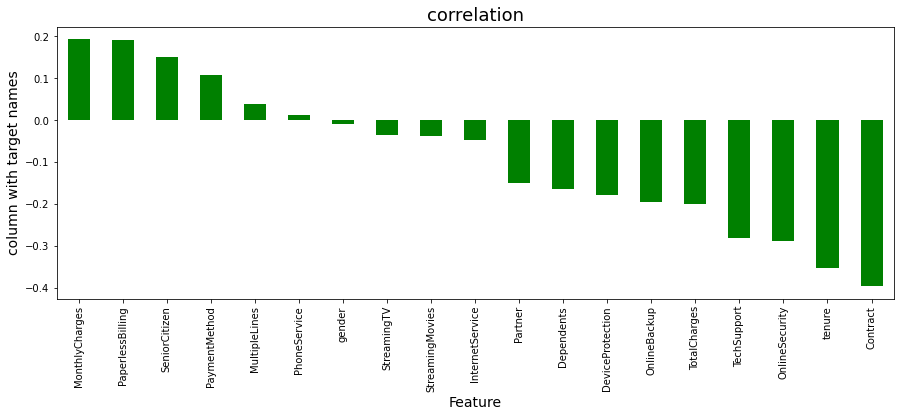

In [37]:
plt.figure(figsize=(15,5))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

 above figure we can see that very less columns are highly positive correlation with the Churn datatype.gender and phoneService is the very less correlation with the target column.need to remove this.

In [38]:
df.drop('gender', axis=1, inplace=True)
df.drop('PhoneService', axis=1, inplace=True)

# Skewness and outliers removal:

In [39]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([], dtype=int64), array([], dtype=int64))

In [40]:
df_new=df[(z<3).all(axis=1)]
df_new

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1.0,0.0,1,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,0,0.0,0.0,34,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,0,0.0,0.0,2,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,0,0.0,0.0,45,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0,0.0,0.0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1.0,1.0,24,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,0,1.0,1.0,72,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,0,1.0,1.0,11,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,1,1.0,0.0,4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


outliers remove from our datasets

In [41]:
df_new.shape

(7043, 18)

In [42]:
df.shape

(7043, 18)

here we can see that no outliers present in our datasets.hence we will remove skewness in our dataset.

In [43]:
x=df_new.drop('Churn', axis=1)
y=df_new['Churn']
print(x.shape)
print(y.shape)

(7043, 17)
(7043,)


In [44]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [45]:
df.skew()

SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

Skewness has now been reduced.

# Let's perform scaling now:

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(df_new)

array([[-0.43991649,  1.03453023, -0.65401193, ...,  0.40968472,
        -1.1585412 , -1.81058786],
       [-0.43991649, -0.96662231, -0.65401193, ...,  1.31889872,
        -0.23949171,  0.25331304],
       [-0.43991649, -0.96662231, -0.65401193, ...,  1.31889872,
        -0.34266505, -1.38726921],
       ...,
       [-0.43991649,  1.03453023,  1.5290241 , ...,  0.40968472,
        -1.16724064, -0.85989943],
       [ 2.27315869,  1.03453023, -0.65401193, ...,  1.31889872,
         0.33431207, -0.92296815],
       [-0.43991649, -0.96662231, -0.65401193, ..., -1.48983732,
         1.33886338,  1.48444325]])

In [47]:
x=df_new ##assigned to x again

# class imbalancement:

In [48]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE(k_neighbors=4)
x,y=oversample.fit_resample(x,y)

In [49]:
y.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

now our target columns is balanced

# Finding Best RandomState:

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [51]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, " on Random State ",maxRS)

Best accuracy is  0.7922705314009661  on Random State  59


In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

In [53]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),AdaBoostClassifier(),RandomForestClassifier()]

for m in model:
    m.fit(x_train,y_train)
    #m.score(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy Score of',m,'is:', acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('\n')

Accuracy Score of LogisticRegression() is: 0.7922705314009661
[[794 222]
 [208 846]]
              precision    recall  f1-score   support

         0.0       0.79      0.78      0.79      1016
         1.0       0.79      0.80      0.80      1054

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



Accuracy Score of DecisionTreeClassifier() is: 0.7859903381642512
[[815 201]
 [242 812]]
              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79      1016
         1.0       0.80      0.77      0.79      1054

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



Accuracy Score of SVC() is: 0.8106280193236715
[[788 228]
 [164 890]]
              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80

Lets check cross validation for better accuracy score

In [54]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),AdaBoostClassifier(),RandomForestClassifier()]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print("Score for",m,"is: ",score.mean())

Score for LogisticRegression() is:  0.7715517076325702
Score for DecisionTreeClassifier() is:  0.7868286156583381
Score for SVC() is:  0.7963886962592491
Score for AdaBoostClassifier() is:  0.804798976377769
Score for RandomForestClassifier() is:  0.8454869327057111


With DecisionTreeClassifier model there is very less difference in accuracy and cross validation score, Hence the best model is DecisionTreeClassifier.

# AUC-ROC CURVE:

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [56]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(probability=True),AdaBoostClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(x_train,y_train)
    y_pred_prob=m.predict_proba(x_test)[:,1]    
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    print('AUC Score of', m)
    print(auc_score)
    print('\n')

AUC Score of LogisticRegression()
0.7920763047408447


AUC Score of DecisionTreeClassifier()
0.7851379820406699


AUC Score of SVC(probability=True)
0.8099964141104752


AUC Score of AdaBoostClassifier()
0.8231596169074692


AUC Score of RandomForestClassifier()
0.8522127926608795




as we can see that the AUC score of DecisionTreeClassifier is best. now we are Plotting roc_auc curve with the help of TPR(TRUE POSITIVE RATE) & FPR(FALSE POSITIVE RATE)

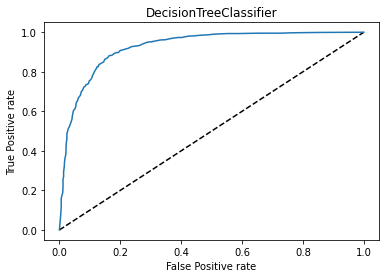

In [57]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="DecisionTreeClassifier")
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('DecisionTreeClassifier')
plt.show()

# Hyperparameter Training:

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
parameters={'max_depth':np.arange(2,10),
             'criterion':['gini','entropy'],
             'splitter':['best','random'],
             'max_features':['auto','sqrt','log2']}

In [61]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [62]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [63]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [64]:
Final_mod= DecisionTreeClassifier(criterion='gini',max_depth=9,max_features='sqrt',splitter='best')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

80.0


After hyperparamete tuning,we are getting best accuracy 80.0%

# Saving the best Model:

In [65]:
import pickle
filename= 'Customer_Churn_Prediction.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))

# Conclusion:

In [67]:
#load the model from the disk

loaded_model = pickle.load(open('Customer_Churn_Prediction.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.8


In [68]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Orginal"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069
Predicted,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
Orginal,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [69]:
#end